In [114]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [115]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [116]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [117]:
train_images.shape

(60000, 28, 28)

In [118]:
train_images[0,23,23]

194

In [119]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [120]:
type(train_images)

numpy.ndarray

In [121]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

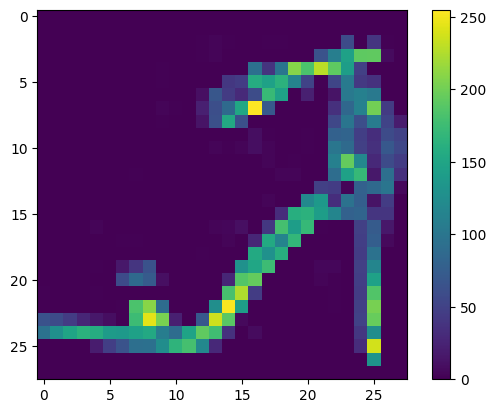

In [130]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [131]:
train_images=train_images/255.0
test_images=test_images/255.0

In [132]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#inputlayer
    keras.layers.Dense(128,activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='softmax')# output layer
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [133]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [134]:
model.fit(train_images,train_labels,epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.7825 - loss: 0.6224


In [135]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print("Test Accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8449 - loss: 0.4408
Test Accuracy: 0.8375999927520752


In [136]:
predictions=model.predict(test_images)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
[[3.9870014e-05 1.7665867e-06 2.4556788e-05 ... 2.4874339e-02
  8.3825020e-03 9.4282961e-01]
 [2.7506478e-05 1.1639496e-06 9.8690295e-01 ... 1.0916377e-11
  1.2672579e-06 1.6422978e-10]
 [7.1343975e-06 9.9995929e-01 4.7652679e-06 ... 1.0318562e-09
  1.4676749e-08 2.0385111e-09]
 ...
 [2.9048381e-02 2.9923835e-05 1.2587477e-03 ... 1.5606213e-06
  9.4661444e-01 1.2610852e-05]
 [1.1187394e-06 9.9973875e-01 3.1459715e-06 ... 3.8231903e-08
  1.4107754e-07 1.0832858e-06]
 [1.0805060e-03 2.3130233e-04 4.2268718e-03 ... 6.6279225e-02
  3.8600340e-02 6.0455664e-03]]


In [137]:
np.argmax(predictions[1])

2

Pullover


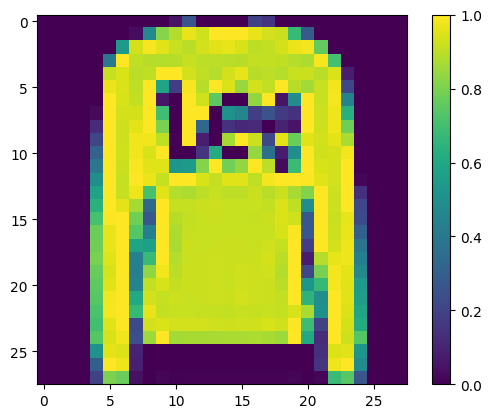

In [138]:
print(class_name[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [139]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)



In [141]:
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()




In [142]:
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


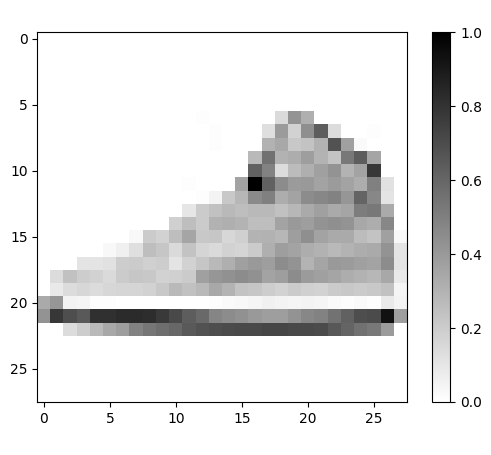

In [143]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)